# Name: Sarmad Hassan

## The Sparks Foundation: Data Science and Business Analytics Internship

### Task 3: Exploratory Data Analysis - Retail

● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can work to make more profit. 

● What all business problems you can derive by exploring the data?

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Dataset**

In [2]:
# Show 5 samples
df = pd.read_csv("SampleSuperstore.csv")
df.sample(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6196,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19143,East,Office Supplies,Storage,71.376,3,0.2,-4.4610
5511,Standard Class,Consumer,United States,Medford,Oregon,97504,West,Office Supplies,Paper,32.896,4,0.2,11.1024
8576,First Class,Consumer,United States,Concord,New Hampshire,3301,East,Furniture,Furnishings,102.300,1,0.0,26.5980
9004,Same Day,Consumer,United States,Spokane,Washington,99207,West,Office Supplies,Art,23.840,8,0.0,6.4368
7830,Standard Class,Corporate,United States,San Diego,California,92105,West,Technology,Phones,311.976,3,0.2,38.9970


# Exploratory Data Analysis

In [3]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
# Check Null Values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
# Statistical Analysis
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df = df.drop(columns = ["Country", "Postal Code"])
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Data Insights

**Orders by Ship Mode**

In [7]:
# No. of Orders by Ship Mode
sm = df["Ship Mode"].value_counts()
sm = sm.to_frame().reset_index()
sm.columns = ["Ship Mode", "Orders"]
sm

,Ship Mode,Orders
0,Standard Class,5968
1,Second Class,1945
2,First Class,1538
3,Same Day,543


In [8]:
# Percentage of Orders by Ship Mode
sm = (df["Ship Mode"].value_counts() / len(df["Ship Mode"])) * 100
sm = sm.to_frame().reset_index()
sm.columns = ["Ship Mode", "Percentage"]
sm

,Ship Mode,Percentage
0,Standard Class,59.715829
1,Second Class,19.461677
2,First Class,15.389234
3,Same Day,5.433260


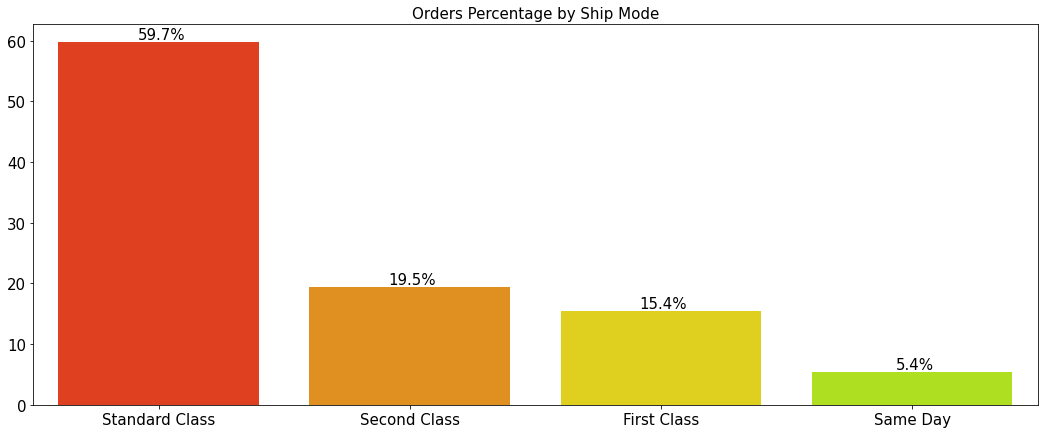

In [9]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Ship Mode", y = "Percentage", data = sm, palette = "prism")
for p in graph.patches:
        graph.annotate('{:.01f}%'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Orders Percentage by Ship Mode", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [10]:
# Sales and Quantity by Ship Mode
sqsm = df.groupby("Ship Mode")[["Sales", "Profit"]] .agg(["sum"]).reset_index()
sqsm = sqsm.droplevel(1, axis = 1)
sqsm

,Ship Mode,Sales,Profit
0,First Class,3.514284e+05,48969.8399
1,Same Day,1.283631e+05,15891.7589
2,Second Class,4.591936e+05,57446.6354
3,Standard Class,1.358216e+06,164088.7875


In [11]:
sqsm = sqsm.melt("Ship Mode", var_name = "Business", value_name = "Sum")
sqsm

,Ship Mode,Business,Sum
0,First Class,Sales,3.514284e+05
1,Same Day,Sales,1.283631e+05
2,Second Class,Sales,4.591936e+05
3,Standard Class,Sales,1.358216e+06
4,First Class,Profit,4.896984e+04
5,Same Day,Profit,1.589176e+04
6,Second Class,Profit,5.744664e+04
7,Standard Class,Profit,1.640888e+05


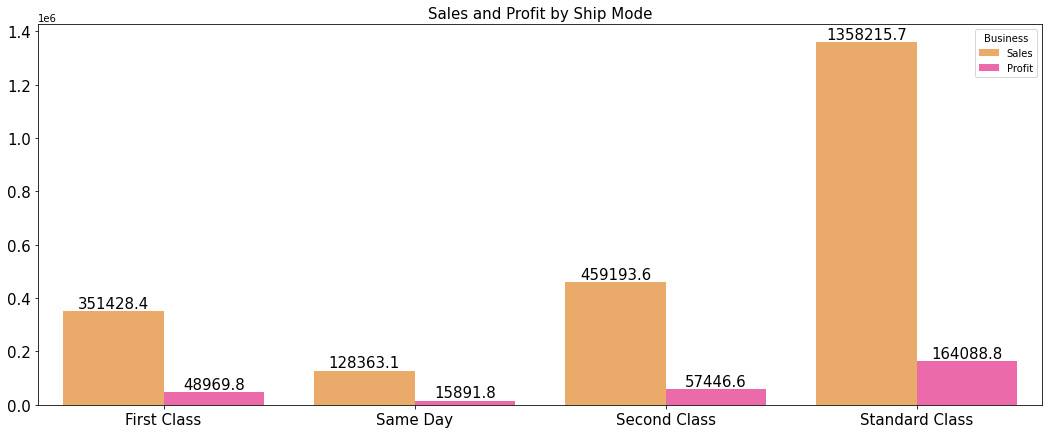

In [12]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Ship Mode", y = "Sum", hue = "Business", data = sqsm, palette = "spring_r")
for p in graph.patches:
        graph.annotate('{:.01f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Sales and Profit by Ship Mode", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Orders by Segments**

In [13]:
# Number of orders by segments
os = df["Segment"].value_counts()
os = os.to_frame().reset_index()
os.columns = ["Segment", "Orders"]
os

,Segment,Orders
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


In [14]:
# Percentage of orders by segments
os = (df["Segment"].value_counts() / len(df["Segment"])) * 100
os = os.to_frame().reset_index()
os.columns = ["Segment", "Orders Percentage"]
os

,Segment,Orders Percentage
0,Consumer,51.941165
1,Corporate,30.218131
2,Home Office,17.840704


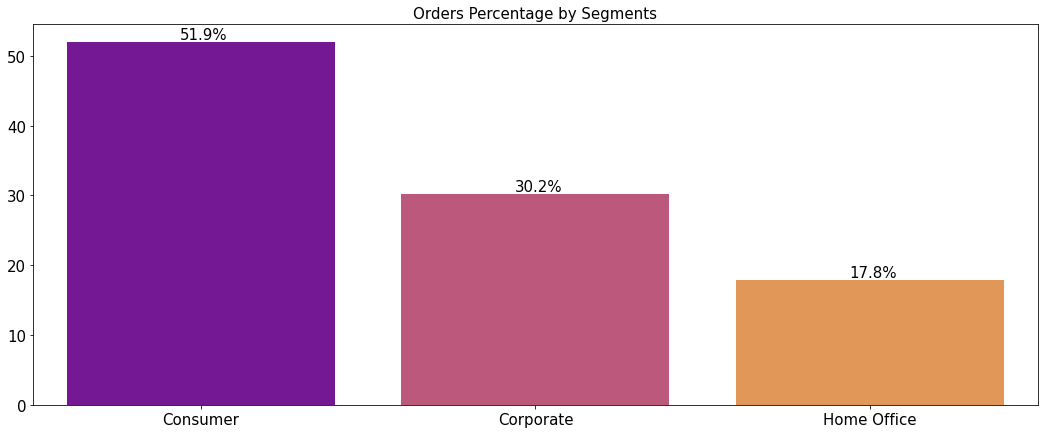

In [15]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Segment", y = "Orders Percentage", data = os, palette = "plasma")
for p in graph.patches:
        graph.annotate('{:.01f}%'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Orders Percentage by Segments", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [16]:
# Sales and Profit by Segment
sps = df.groupby("Segment")[["Sales", "Profit"]].agg(["sum"]).reset_index()
sps = sps.droplevel(1, axis = 1)
sps = sps.melt("Segment", var_name = "Business", value_name = "Sum")
sps

,Segment,Business,Sum
0,Consumer,Sales,1.161401e+06
1,Corporate,Sales,7.061464e+05
2,Home Office,Sales,4.296531e+05
3,Consumer,Profit,1.341192e+05
4,Corporate,Profit,9.197913e+04
5,Home Office,Profit,6.029868e+04


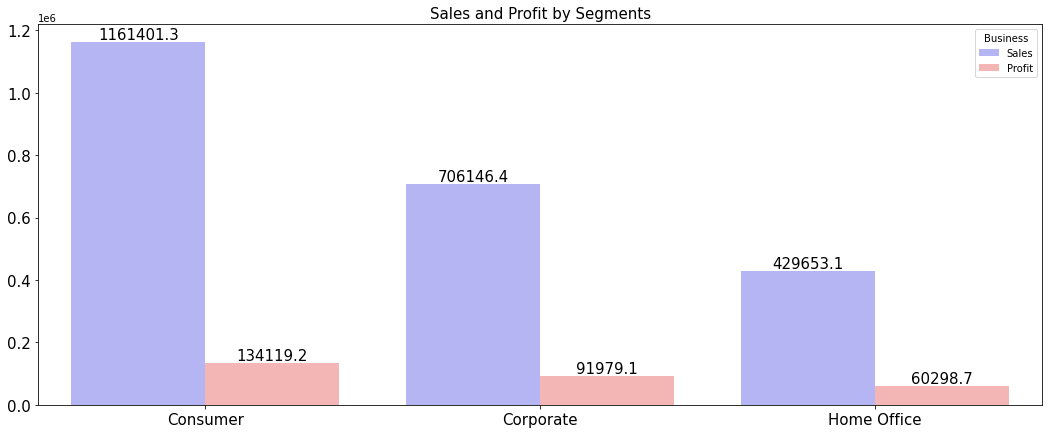

In [17]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Segment", y = "Sum", hue = "Business", data = sps, palette = "bwr")
for p in graph.patches:
        graph.annotate('{:.01f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Sales and Profit by Segments", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Top 5 Cities by Orders**

In [18]:
# Number of Top 5 Cities by Orders
oc = df["City"].value_counts().head()
oc = oc.to_frame().reset_index()
oc.columns = ["City", "Orders"]
oc

,City,Orders
0,New York City,915
1,Los Angeles,747
2,Philadelphia,537
3,San Francisco,510
4,Seattle,428


In [19]:
# Percentage of Top 5 Cities by Orders
ocp = (df["City"].value_counts().head() / len(df)) * 100
ocp = ocp.to_frame().reset_index()
ocp.columns = ["City", "Orders Percentage"]
ocp

,City,Orders Percentage
0,New York City,9.155493
1,Los Angeles,7.474485
2,Philadelphia,5.373224
3,San Francisco,5.103062
4,Seattle,4.282570


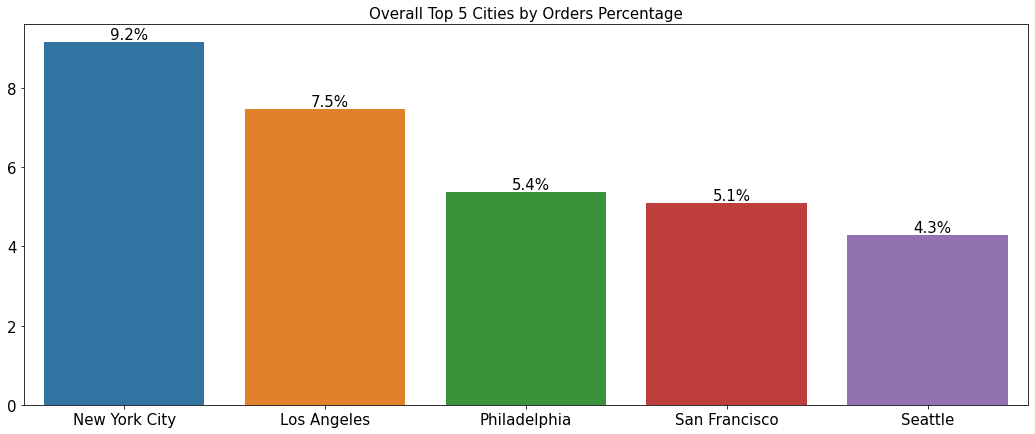

In [20]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "City", y = "Orders Percentage", data = ocp, palette = "tab10")
for p in graph.patches:
        graph.annotate('{:.01f}%'.format(p.get_height()), 
                      (p.get_x()+0.425, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Overall Top 5 Cities by Orders Percentage", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [21]:
# Sales and Profit by Top 5 Cities
spc = df.groupby("City")[["Sales", "Profit"]].agg(["sum"]).reset_index()
spc = spc.droplevel(1, axis = 1)
spc = spc.sort_values(by = ["Profit", "Sales"], ascending = False)
spc = spc.head()
spc

,City,Sales,Profit
329,New York City,256368.161,62036.9837
266,Los Angeles,175851.341,30440.7579
452,Seattle,119540.742,29156.0967
438,San Francisco,112669.092,17507.3854
123,Detroit,42446.944,13181.7908


In [22]:
spc = spc.melt("City", var_name = "Business", value_name = "Sum")
spc

,City,Business,Sum
0,New York City,Sales,256368.1610
1,Los Angeles,Sales,175851.3410
2,Seattle,Sales,119540.7420
3,San Francisco,Sales,112669.0920
4,Detroit,Sales,42446.9440
5,New York City,Profit,62036.9837
6,Los Angeles,Profit,30440.7579
7,Seattle,Profit,29156.0967
8,San Francisco,Profit,17507.3854
9,Detroit,Profit,13181.7908


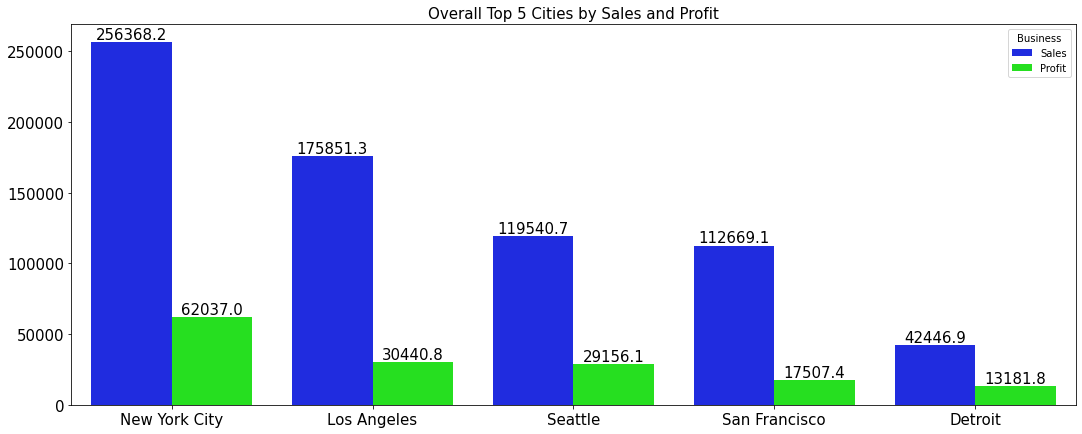

In [23]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "City", y = "Sum", hue = "Business", data = spc, palette = "hsv_r")
for p in graph.patches:
        graph.annotate('{:.01f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Overall Top 5 Cities by Sales and Profit", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Top 5 States by Order**

In [24]:
# Number of Overall Top 5 Orders by State
so = df["State"].value_counts()
so = so.head()
so = so.to_frame().reset_index()
so.columns = ["State", "Orders"]
so

,State,Orders
0,California,2001
1,New York,1128
2,Texas,985
3,Pennsylvania,587
4,Washington,506


In [25]:
# Percentage of Overall Top 5 Orders by State
sop = (df["State"].value_counts().head() / len(df)) * 100
sop = sop.to_frame().head()
sop = sop.reset_index()
sop.columns = ["State", "Orders Percentage"]
sop

,State,Orders Percentage
0,California,20.022013
1,New York,11.286772
2,Texas,9.855914
3,Pennsylvania,5.873524
4,Washington,5.063038


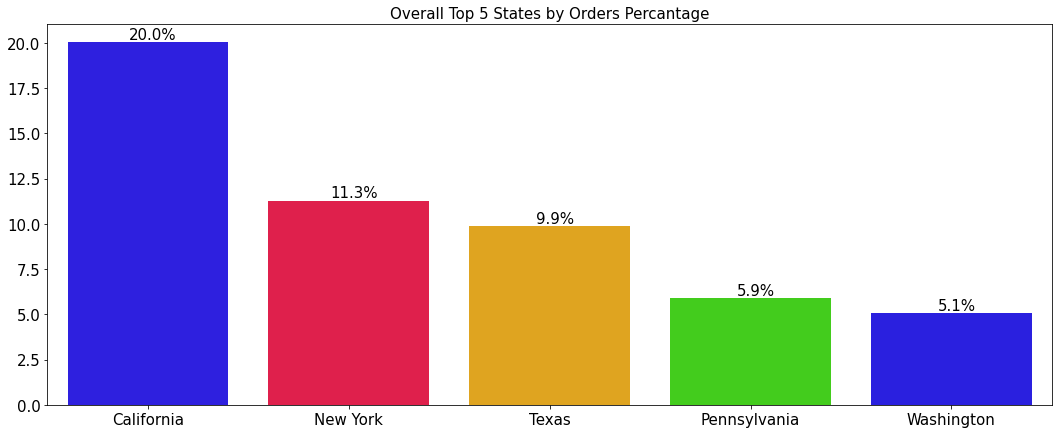

In [26]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "State", y = "Orders Percentage", data = sop, palette = "prism_r")
for p in graph.patches:
        graph.annotate('{:.01f}%'.format(p.get_height()), 
                      (p.get_x()+0.425, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Overall Top 5 States by Orders Percantage", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [27]:
# Overall Top 5 States by Sales and Profit
ssp = df.groupby("State")[["Sales", "Profit"]].agg(["sum"]).reset_index()
ssp = ssp.droplevel(1, axis = 1)
ssp = ssp.sort_values(by = ["Sales", "Profit"], ascending = False).head()
ssp = ssp.melt("State", var_name = "Business", value_name = "Sum")
ssp

,State,Business,Sum
0,California,Sales,457687.6315
1,New York,Sales,310876.2710
2,Texas,Sales,170188.0458
3,Washington,Sales,138641.2700
4,Pennsylvania,Sales,116511.9140
5,California,Profit,76381.3871
6,New York,Profit,74038.5486
7,Texas,Profit,-25729.3563
8,Washington,Profit,33402.6517
9,Pennsylvania,Profit,-15559.9603


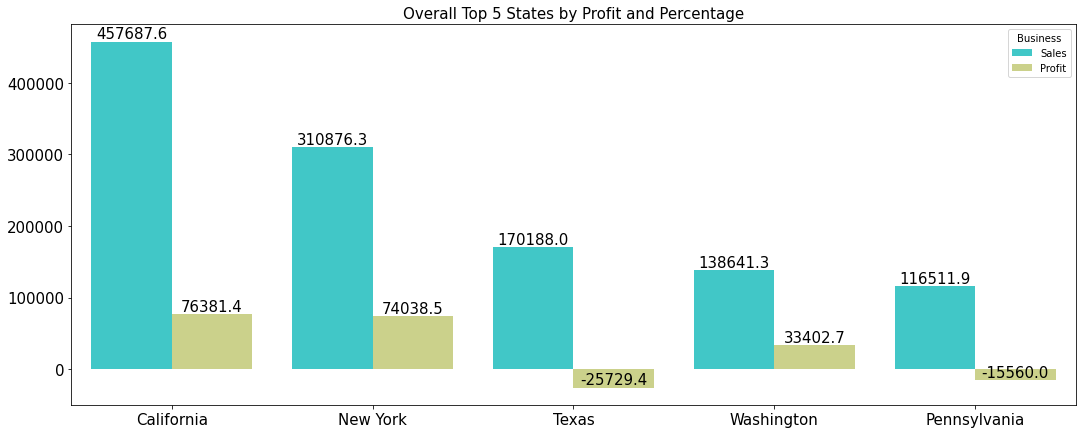

In [28]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "State", y = "Sum", hue = "Business", data = ssp, palette = "rainbow")
for p in graph.patches:
        graph.annotate('{:.01f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Overall Top 5 States by Profit and Percentage", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Orders by Region**

In [29]:
# Number of Orders by Region
orr = df["Region"].value_counts().to_frame().reset_index()
orr.columns = ["Region", "Orders"]
orr

,Region,Orders
0,West,3203
1,East,2848
2,Central,2323
3,South,1620


In [30]:
# Percentage of Orders by Region 
orrp = (df["Region"].value_counts() / len(df)) * 100
orrp = orrp.to_frame().reset_index()
orrp.columns = ["Region", "Orders Percentage"]
orrp

,Region,Orders Percentage
0,West,32.049230
1,East,28.497098
2,Central,23.243946
3,South,16.209726


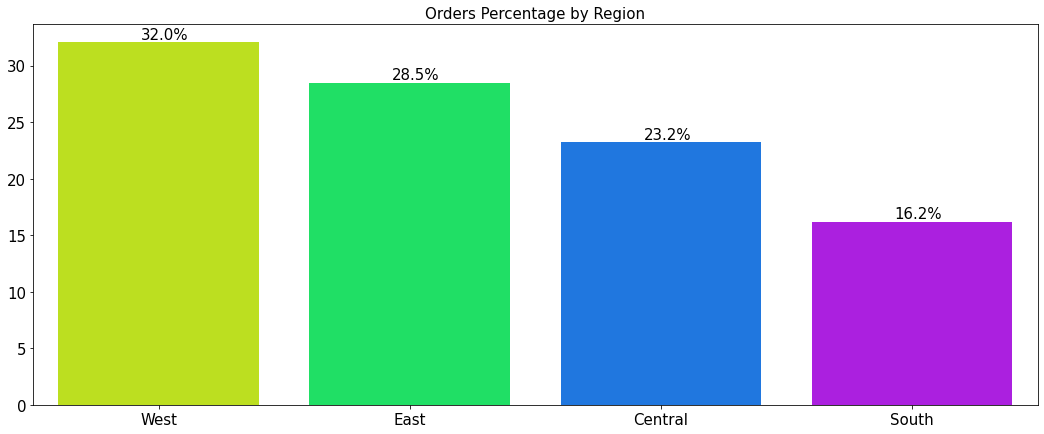

In [31]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Region", y = "Orders Percentage", data = orrp, palette = "hsv")
for p in graph.patches:
        graph.annotate('{:.01f}%'.format(p.get_height()), 
                      (p.get_x()+0.425, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Orders Percentage by Region", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [32]:
# Sales and Profit by Region
spr = df.groupby("Region")[["Sales", "Profit"]].agg(["sum"]).reset_index()
spr = spr.droplevel(1, axis = 1)
spr = spr.melt("Region", var_name = "Business", value_name = "Sum")
spr

,Region,Business,Sum
0,Central,Sales,501239.8908
1,East,Sales,678781.2400
2,South,Sales,391721.9050
3,West,Sales,725457.8245
4,Central,Profit,39706.3625
5,East,Profit,91522.7800
6,South,Profit,46749.4303
7,West,Profit,108418.4489


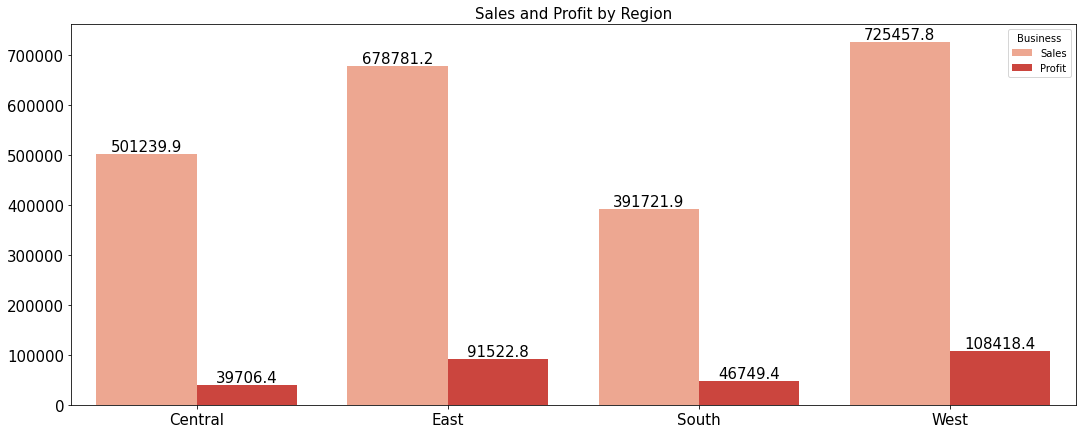

In [33]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Region",y = "Sum", hue = "Business", data = spr, palette = "Reds")
for p in graph.patches:
        graph.annotate('{:.01f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Sales and Profit by Region", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Orders by Category**

In [34]:
# Orders by Category
oc = df["Category"].value_counts().to_frame().reset_index()
oc.columns = ["Category", "Orders"]
oc

,Category,Orders
0,Office Supplies,6026
1,Furniture,2121
2,Technology,1847


In [35]:
# Percentage of Orders by Category
ocp = (df["Category"].value_counts() / len(df)) * 100
ocp = ocp.to_frame().reset_index()
ocp.columns = ["Category", "Orders Percentage"]
ocp

,Category,Orders Percentage
0,Office Supplies,60.296178
1,Furniture,21.222734
2,Technology,18.481089


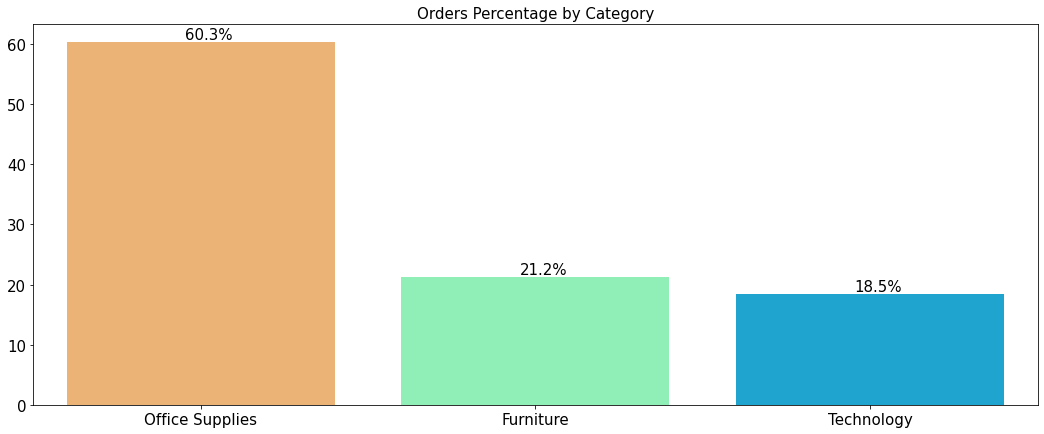

In [36]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Category", y = "Orders Percentage", data = ocp, palette = "rainbow_r")
for p in graph.patches:
        graph.annotate('{:.01f}%'.format(p.get_height()), 
                      (p.get_x()+0.425, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Orders Percentage by Category", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [37]:
# Sales and Profit by Category
spc = df.groupby("Category")[["Sales", "Profit"]].agg(["sum"]).reset_index()
spc = spc.droplevel(1, axis = 1)
spc = spc.melt("Category", var_name = "Business", value_name = "Sum")
spc

,Category,Business,Sum
0,Furniture,Sales,741999.7953
1,Office Supplies,Sales,719047.0320
2,Technology,Sales,836154.0330
3,Furniture,Profit,18451.2728
4,Office Supplies,Profit,122490.8008
5,Technology,Profit,145454.9481


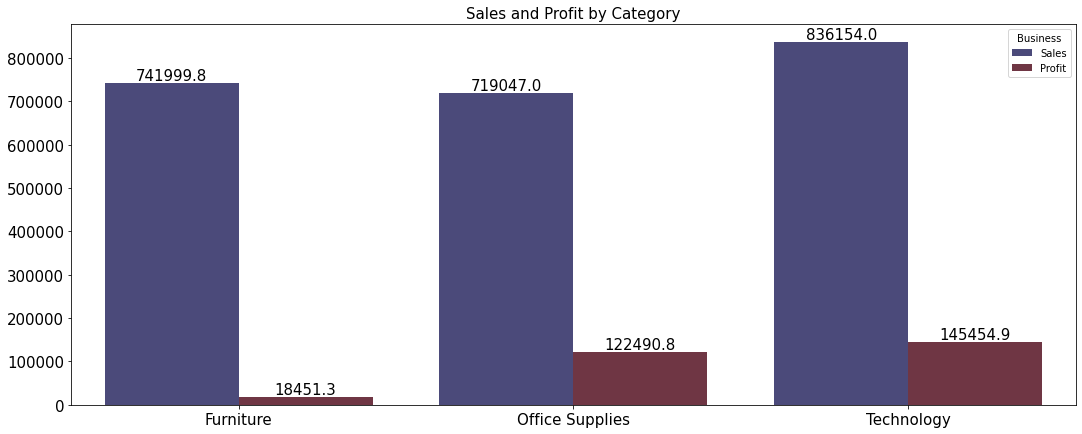

In [38]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Category", y = "Sum", hue = "Business", data = spc, palette = "icefire")
for p in graph.patches:
        graph.annotate('{:.01f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Sales and Profit by Category", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Orders by Sub-Category**

In [39]:
# Number of Orders by Sub-Category
osc = df["Sub-Category"].value_counts()
osc = osc.to_frame().reset_index()
osc.columns = ["Sub-Category", "Orders"]
osc

,Sub-Category,Orders
0,Binders,1523
1,Paper,1370
2,Furnishings,957
3,Phones,889
4,Storage,846
5,Art,796
6,Accessories,775
7,Chairs,617
8,Appliances,466
9,Labels,364


In [40]:
# Percentage of Orders by Sub-Category
posc = (df["Sub-Category"].value_counts() / len(df)) * 100
posc = posc.to_frame().reset_index()
posc.columns = ["Sub-Category", "Orders Percentage"]
posc

,Sub-Category,Orders Percentage
0,Binders,15.239143
1,Paper,13.708225
2,Furnishings,9.575745
3,Phones,8.895337
4,Storage,8.465079
5,Art,7.964779
6,Accessories,7.754653
7,Chairs,6.173704
8,Appliances,4.662798
9,Labels,3.642185


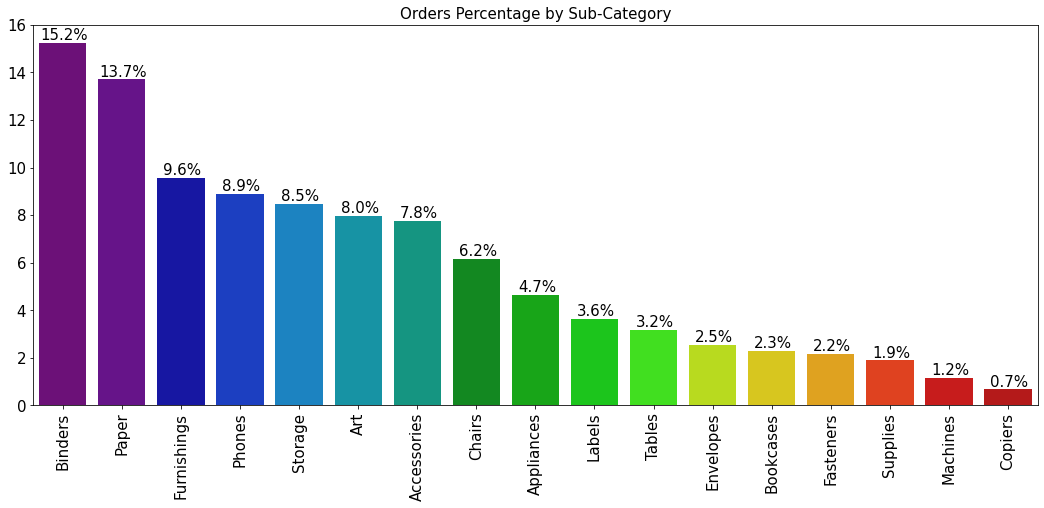

In [41]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Sub-Category", y = "Orders Percentage", data = posc, palette = "nipy_spectral")
for p in graph.patches:
        graph.annotate('{:.01f}%'.format(p.get_height()), 
                      (p.get_x()+0.425, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Orders Percentage by Sub-Category", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [42]:
# Sales and Profit by Sub-Category
spsc = df.groupby("Sub-Category")[["Sales", "Profit"]].agg(["sum"]).reset_index()
spsc = spsc.droplevel(1, axis = 1)
spsc = spsc.melt("Sub-Category", var_name = "Business", value_name = "Sum")
spsc.head()

,Sub-Category,Business,Sum
0,Accessories,Sales,167380.3180
1,Appliances,Sales,107532.1610
2,Art,Sales,27118.7920
3,Binders,Sales,203412.7330
4,Bookcases,Sales,114879.9963


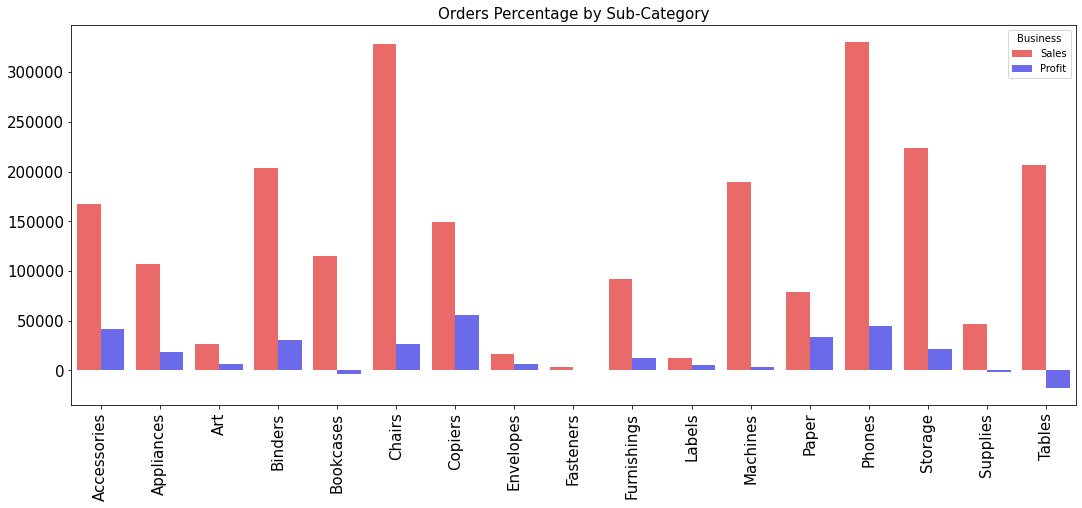

In [43]:
plt.figure(figsize = (18, 7))
sns.barplot(x = "Sub-Category", y = "Sum", hue = "Business", data = spsc, palette = "seismic_r")
plt.title("Orders Percentage by Sub-Category", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Quantity by Ship Mode**

In [44]:
qsm = df.groupby("Ship Mode")["Quantity"].agg(["sum"]).reset_index()
qsm.columns = ["Ship Mode", "Quantity"]
qsm

,Ship Mode,Quantity
0,First Class,5693
1,Same Day,1960
2,Second Class,7423
3,Standard Class,22797


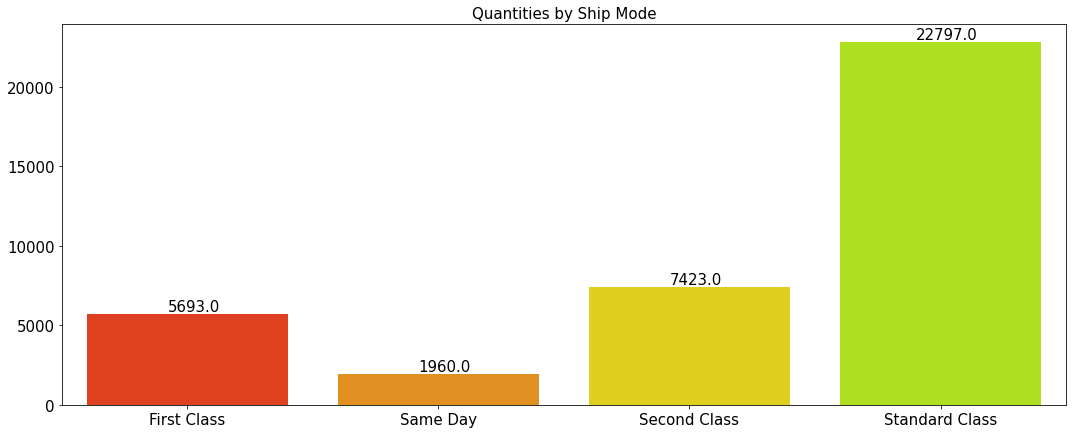

In [45]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Ship Mode", y = "Quantity", data = qsm, palette = "prism")
for p in graph.patches:
        graph.annotate('{:.01f}'.format(p.get_height()), 
                      (p.get_x()+0.425, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Quantities by Ship Mode", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Quantity by Segment**

In [46]:
# Quantity by Segment
qs = df.groupby("Segment")["Quantity"].agg(["sum"]).reset_index()
qs.columns = ["Segment", "Quantity"]
qs

,Segment,Quantity
0,Consumer,19521
1,Corporate,11608
2,Home Office,6744


In [47]:
# Quantity Percentage by Segment
qs["Percentage Quantity"] = (qs["Quantity"] / sum(qs["Quantity"])) * 100
qsp = qs.drop(columns = ["Quantity"])
qsp

,Segment,Percentage Quantity
0,Consumer,51.543316
1,Corporate,30.649803
2,Home Office,17.806881


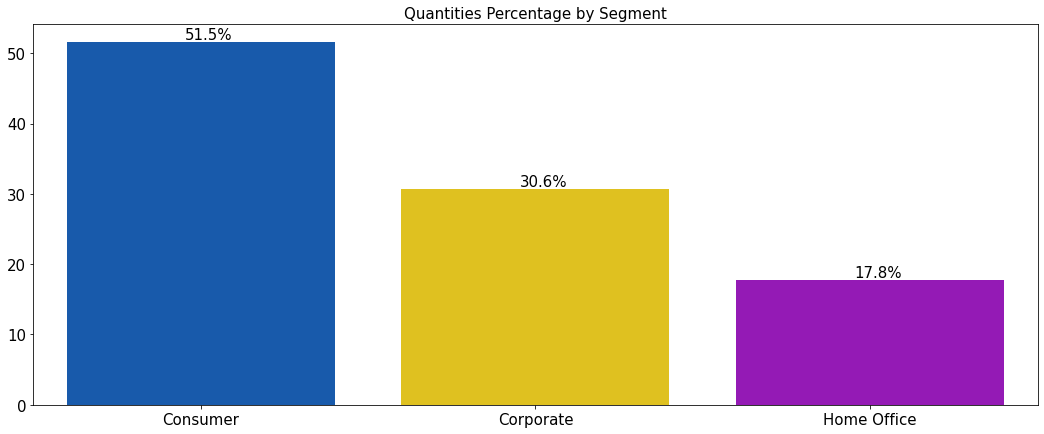

In [48]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Segment", y = "Percentage Quantity", data = qsp, palette = "prism")
for p in graph.patches:
        graph.annotate('{:.01f}%'.format(p.get_height()), 
                      (p.get_x()+0.425, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Quantities Percentage by Segment", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Quantity by City**

In [54]:
# Top 5 Cities by Quantity Sold
qc = df.groupby("City")["Quantity"].agg(["sum"]).sort_values(by = "sum", ascending = False).head()
qc = qc.reset_index()
qc.columns = ["City", "Quantity"]
qc["Percentage"] = qc["Quantity"] / sum(qc["Quantity"]) * 100
qc

,City,Quantity,Percentage
0,New York City,3417,28.952720
1,Los Angeles,2879,24.394170
2,Philadelphia,1981,16.785291
3,San Francisco,1935,16.395526
4,Seattle,1590,13.472293


**Quantity by State**

In [60]:
# Top 5 States by Quantity Sold
qs = df.groupby("State")["Quantity"].agg(["sum"]).reset_index().sort_values(by = "sum", ascending = False).head()
qs.columns = ["State", "Quantity"]
qs["Percentage"] = (qs["Quantity"] / sum(qs["Quantity"])) * 100
qs

,State,Quantity,Percentage
3,California,7667,39.015826
30,New York,4224,21.495089
41,Texas,3724,18.950690
36,Pennsylvania,2153,10.956185
45,Washington,1883,9.582210


**Quantity by Region**

In [63]:
qr = df.groupby("Region")["Quantity"].agg(["sum"]).reset_index().sort_values(by = "sum", ascending = False).head()
qr.columns = ["Region", "Quantity"]
qr["Percentage"] = qr["Quantity"] / sum(qr["Quantity"]) * 100
qr

,Region,Quantity,Percentage
3,West,12266,32.387189
1,East,10618,28.035804
0,Central,8780,23.182742
2,South,6209,16.394265


**Quantity Sold by Category**

In [70]:
qsc = df.groupby("Category")["Quantity"].agg(["sum"]).reset_index().sort_values(by = "sum", ascending = False)
qsc.columns = ["Category", "Quantities Sold"]
qsc["Percentage"] = (qsc["Quantities Sold"] / sum(qsc["Quantities Sold"])) * 100
qsc

,Category,Quantities Sold,Percentage
1,Office Supplies,22906,60.481082
0,Furniture,8028,21.197159
2,Technology,6939,18.321760


**Quantity Sold by Category**

In [69]:
qsc = df.groupby("Sub-Category")["Quantity"].agg(["sum"]).reset_index().sort_values(by = "sum", ascending = False).head()
qsc.columns = ["Sub-Category", "Quantities Sold"]
qsc["Percentage"] = (qsc["Quantities Sold"] / sum(qsc["Quantities Sold"])) * 100
qsc

,Sub-Category,Quantities Sold,Percentage
3,Binders,5974,28.229846
12,Paper,5178,24.468387
9,Furnishings,3563,16.836783
13,Phones,3289,15.542009
14,Storage,3158,14.922975


#  Deep Insights

**Sales by Ship Mode and State**

In [78]:
sss = df.groupby(["Ship Mode", "State"])["Sales"].agg(["sum"]).sort_values(by = "sum", ascending = False).head()
sss

sum
Ship Mode      State                  
Standard Class California  255739.1675
               New York    181606.5940
               Texas       104754.8850
Second Class   California   92692.9795
First Class    California   79476.2545

**Sales by Segment and Category** 

In [77]:
ssc = df.groupby(["Segment", "Category"])["Sales"].agg(["sum"]).sort_values(by = "sum", ascending = False)
ssc

sum
Segment     Category                    
Consumer    Technology       406399.8970
            Furniture        391049.3120
            Office Supplies  363952.1360
Corporate   Technology       246450.1190
            Office Supplies  230676.4620
            Furniture        229019.7858
Home Office Technology       183304.0170
            Office Supplies  124418.4340
            Furniture        121930.6975